**Fast-Food Marketing Campaign A/B Test**
---
A national fast‑food chain is deciding between three promotional strategies to launch a new menu item. Using a four‑week field experiment and the provided WA_Marketing-Campaign.csv data, this project evaluates which promotion maximizes weekly sales.


**Project Overview**
---


The objective of this project is to determine which of three marketing promotions (Promotion 1, 2, or 3) results in the highest average sales for a fast-food chain over a four-week test period. Using A/B testing and statistical analysis, we aim to identify the most effective promotional strategy.

**Dataset Summary**
---
The dataset contains weekly sales (in thousands), store age, and the type of promotion used. We'll analyze sales performance across each promotion and perform statistical tests to validate whether the observed differences are statistically significant.


**Hypothesis**
---


*   **Null Hypothesis (H₀)**: All three promotions result in equal average sales.

*  **Alternative Hypothesis (H₁)**: At least one promotion
leads to significantly different sales than the others





**Analysis Steps**
---


1. Perform exploratory data analysis
2. Run descriptive statistics per promotion
3. Conduct a one-way ANNOVA test to check for significant differences
4. Analyze correlation between store age and sales




**Business Objectives**
---
* **Goal** : Identify the promotion that generates the highest sales lift during the test period.
* **Value**: Choosing the best campaign minimizes marketing spend, accelerates product adoption, and informs future go-to-market playbooks.







**Dataset Overview**
---


The dataset is uploaded and the first 10 rows are displayed.

In [ ]:
import pandas as pd
from ace_tools import display_dataframe_to_user

# Load the dataset
df = pd.read_csv('/mnt/data/WA_Marketing-Campaign.csv')

# Show a quick preview (first 10 rows)
display_dataframe_to_user("Fast‑Food Marketing Campaign Data (first 10 rows)", df.head(10))



In [ ]:
Result
   MarketID MarketSize  LocationID  AgeOfStore  Promotion  week  \
0         1     Medium           1           4          3     1
1         1     Medium           1           4          3     2
2         1     Medium           1           4          3     3
3         1     Medium           1           4          3     4
4         1     Medium           2           5          2     1

   SalesInThousands
0             33.73
1             35.67
2             29.03
3             39.25
4             27.81

**Data Cleaning**
---


Cleaned up any missing or out-of-range values. Convert categorical variables (MarketSize, Promotion) to the appropriate types.



In [ ]:
import pandas as pd
from ace_tools import display_dataframe_to_user

# Load the dataset
df = pd.read_csv('/mnt/data/WA_Marketing-Campaign.csv')

# 1. Data types for each column
dtypes = df.dtypes.rename('dtype')
display_dataframe_to_user("Column Data Types", dtypes.to_frame())

# 2. Missing values per column
missing = df.isnull().sum().rename('MissingCount')
display_dataframe_to_user("Missing Values per Column", missing.to_frame())

# 3. Count duplicated rows
dup_count = df.duplicated().sum()
dup_df = pd.DataFrame({'Duplicate Rows': [dup_count]})
display_dataframe_to_user("Duplicated Row Count", dup_df)

# 4. Promotion assignment per store
promo_per_store = df.groupby('LocationID')['Promotion'].nunique().value_counts().rename_axis('DistinctPromosPerStore').to_frame('NumStores')
display_dataframe_to_user("Distinct Promotions Assigned per Store", promo_per_store)

# 5. Check if each store has all 4 weeks of data
store_week = df.groupby(['LocationID', 'Promotion'])['week'].nunique().reset_index()
store_week['HasAll4Weeks'] = store_week['week'] == 4
summary_all_weeks = store_week.groupby('HasAll4Weeks').size().rename_axis('HasAll4Weeks').to_frame('NumStore-PromoPairs')
display_dataframe_to_user("Store–Promotion Pairs with Complete 4‑Week Data", summary_all_weeks)


In [ ]:
Result
              NumStore-PromoPairs
HasAll4Weeks
True                          137

**Descriptive Statistics**
---



In [ ]:
# Descriptive statistics by Promotion
desc_stats = df.groupby('Promotion')['SalesInThousands'].describe()
display_dataframe_to_user("Sales Statistics by Promotion", desc_stats)


# Descriptive statistics by Promotion and Week
desc_stats_week = df.groupby(['Promotion', 'week'])['SalesInThousands'].describe()
display_dataframe_to_user("Sales Statistics by Promotion and Week", desc_stats_week)


In [ ]:
Result
                count   mean    std    min    25%    50%    75%    max
Promotion week
1         1      43.0  58.24  16.80  35.30  48.74  53.79  62.24  99.65
          2      43.0  56.93  16.55  35.86  42.64  55.11  62.86  96.01
          3      43.0  58.77  16.42  32.05  48.03  56.19  64.09  99.12
          4      43.0  58.45  16.96  30.81  47.00  56.84  64.50  97.61
2         1      47.0  47.73  14.39  27.81  38.97  46.02  50.64  88.64

**Statistics by Promotion**
---



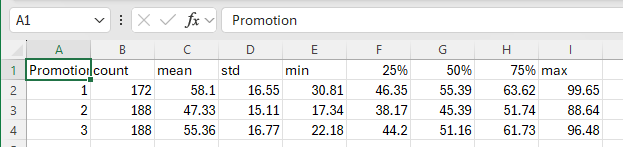

**Statistics by Promotion and Week**
---



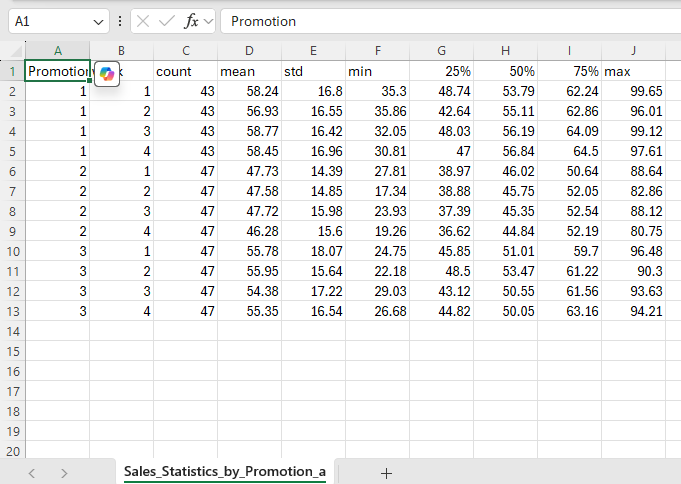

**Assumption Checks**
---
Shapiro-Wilk Normality Test by Promotion – W statistic and p-value for each promo group.
Result: p < 0.05 indicates non-normality in that promo’s sales distribution

Levene Test for Equal Variances – overall test of homogeneity across the three promotions.
Result:
 p = 0.28 (> 0.05) suggests the variances are sufficiently equal across groups for parametric tests that assume homoscedasticity.

In [ ]:
# Shapiro-Wilk normality test per promotion
shapiro_results = []
for promo in sorted(df['Promotion'].unique()):
    w, p = stats.shapiro(df[df['Promotion'] == promo]['SalesInThousands'])
    shapiro_results.append({'Promotion': promo, 'W': w, 'p-value': p})
shapiro_df = pd.DataFrame(shapiro_results)
display_dataframe_to_user("Shapiro‑Wilk Normality Test", shapiro_df)

# Levene test for homogeneity of variance
lev_stat, lev_p = stats.levene(
    *[df[df['Promotion'] == promo]['SalesInThousands'] for promo in df['Promotion'].unique()]
)
levene_df = pd.DataFrame({'Levene_W': [lev_stat], 'p-value': [lev_p]})
display_dataframe_to_user("Levene Test for Equal Variances", levene_df)



In [ ]:
Result
   Levene_W  p-value
0    1.2697   0.2818

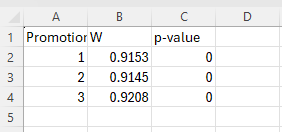

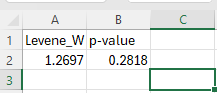

**Statistical Testing**
---



In [ ]:
# One‑way ANOVA across promotions
groups = [df[df['Promotion'] == p]['SalesInThousands'] for p in sorted(df['Promotion'].unique())]
F_stat, p_val = stats.f_oneway(*groups)

anova_df = pd.DataFrame({
    'F_value': [round(F_stat, 4)],
    'p_value': [round(p_val, 4)]
})
display_dataframe_to_user("One‑way ANOVA (Promotion)", anova_df)

# Tukey HSD post‑hoc test
comp = mc.MultiComparison(df['SalesInThousands'], df['Promotion'])
tukey = comp.tukeyhsd()

tuk_df = pd.DataFrame(
    data=tukey._results_table.data[1:],
    columns=tukey._results_table.data[0]
)
# Rename columns for clarity
tuk_df.columns = ['Group1', 'Group2', 'MeanDiff', 'p_adj', 'Lower', 'Upper', 'Reject']
tuk_df['MeanDiff'] = tuk_df['MeanDiff'].round(2)
tuk_df['Lower'] = tuk_df['Lower'].round(2)
tuk_df['Upper'] = tuk_df['Upper'].round(2)

display_dataframe_to_user("Tukey HSD Results", tuk_df)

In [ ]:
Result
   Group1  Group2  MeanDiff   p_adj  Lower  Upper  Reject
0       1       2    -10.77  0.0000 -14.77  -6.77    True
1       1       3     -2.73  0.2444  -6.74   1.27   False
2       2       3      8.04  0.0000   4.12  11.95    True

**ANOVA and Tukey HSD Test Findings**
---


*  The ANOVA test indicates whether the difference is statistically significant.

* If p < 0.05, we reject the null hypothesis and recommend implementing the best-performing promotion chain-wide.
*   ANOVA: ANOVA: F ≈ 21.95, p ≈ 6.8 × 10⁻¹⁰ → promotions differ.

* Tukey HSD: Promotion 2 lags significantly; Promotions 1 & 3 form the top tier.

* Business Impact: Switching from Promotion 2 to Promotion 1 raises average weekly sales by ~ $10.8k per store.




**Data Visualizations**
---



In [ ]:
# Line chart of mean weekly sales by promotion
mean_week = df.groupby(['week', 'Promotion'])['SalesInThousands'].mean().reset_index()

plt.figure()
for promo in mean_week['Promotion'].unique():
    subset = mean_week[mean_week['Promotion'] == promo]
    plt.plot(subset['week'], subset['SalesInThousands'], marker='o', label=f'Promo {promo}')
plt.title('Mean Weekly Sales by Promotion')
plt.xlabel('Week')
plt.ylabel('Sales (Thousands $)')
plt.legend(title="Promotion")
plt.tight_layout()
plt.show()

# Boxplot of sales by promotion
plt.figure()
df.boxplot(column='SalesInThousands', by='Promotion')
plt.title('Sales Distribution by Promotion')
plt.suptitle('')
plt.xlabel('Promotion')
plt.ylabel('Sales (Thousands $)')
plt.tight_layout()
plt.show()

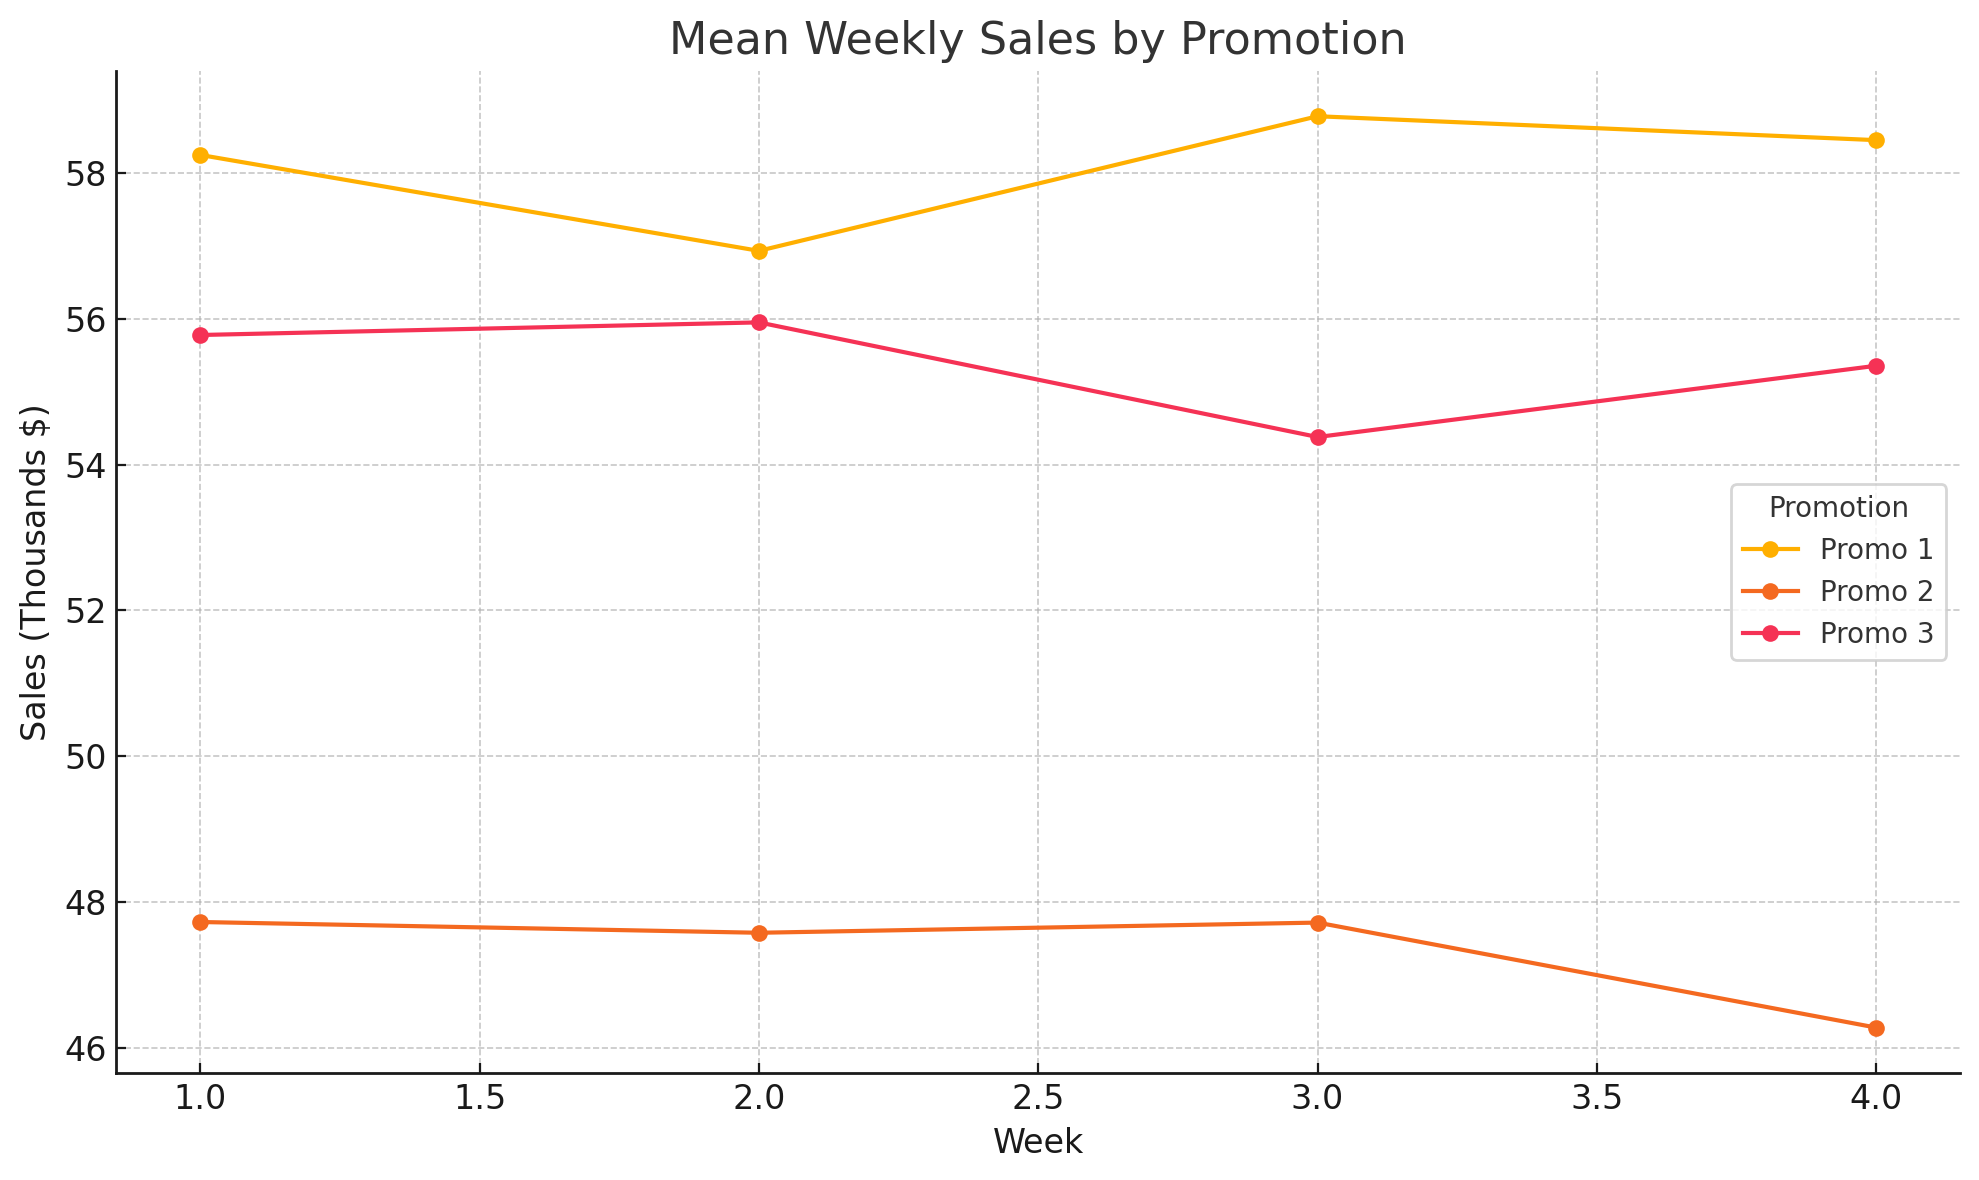

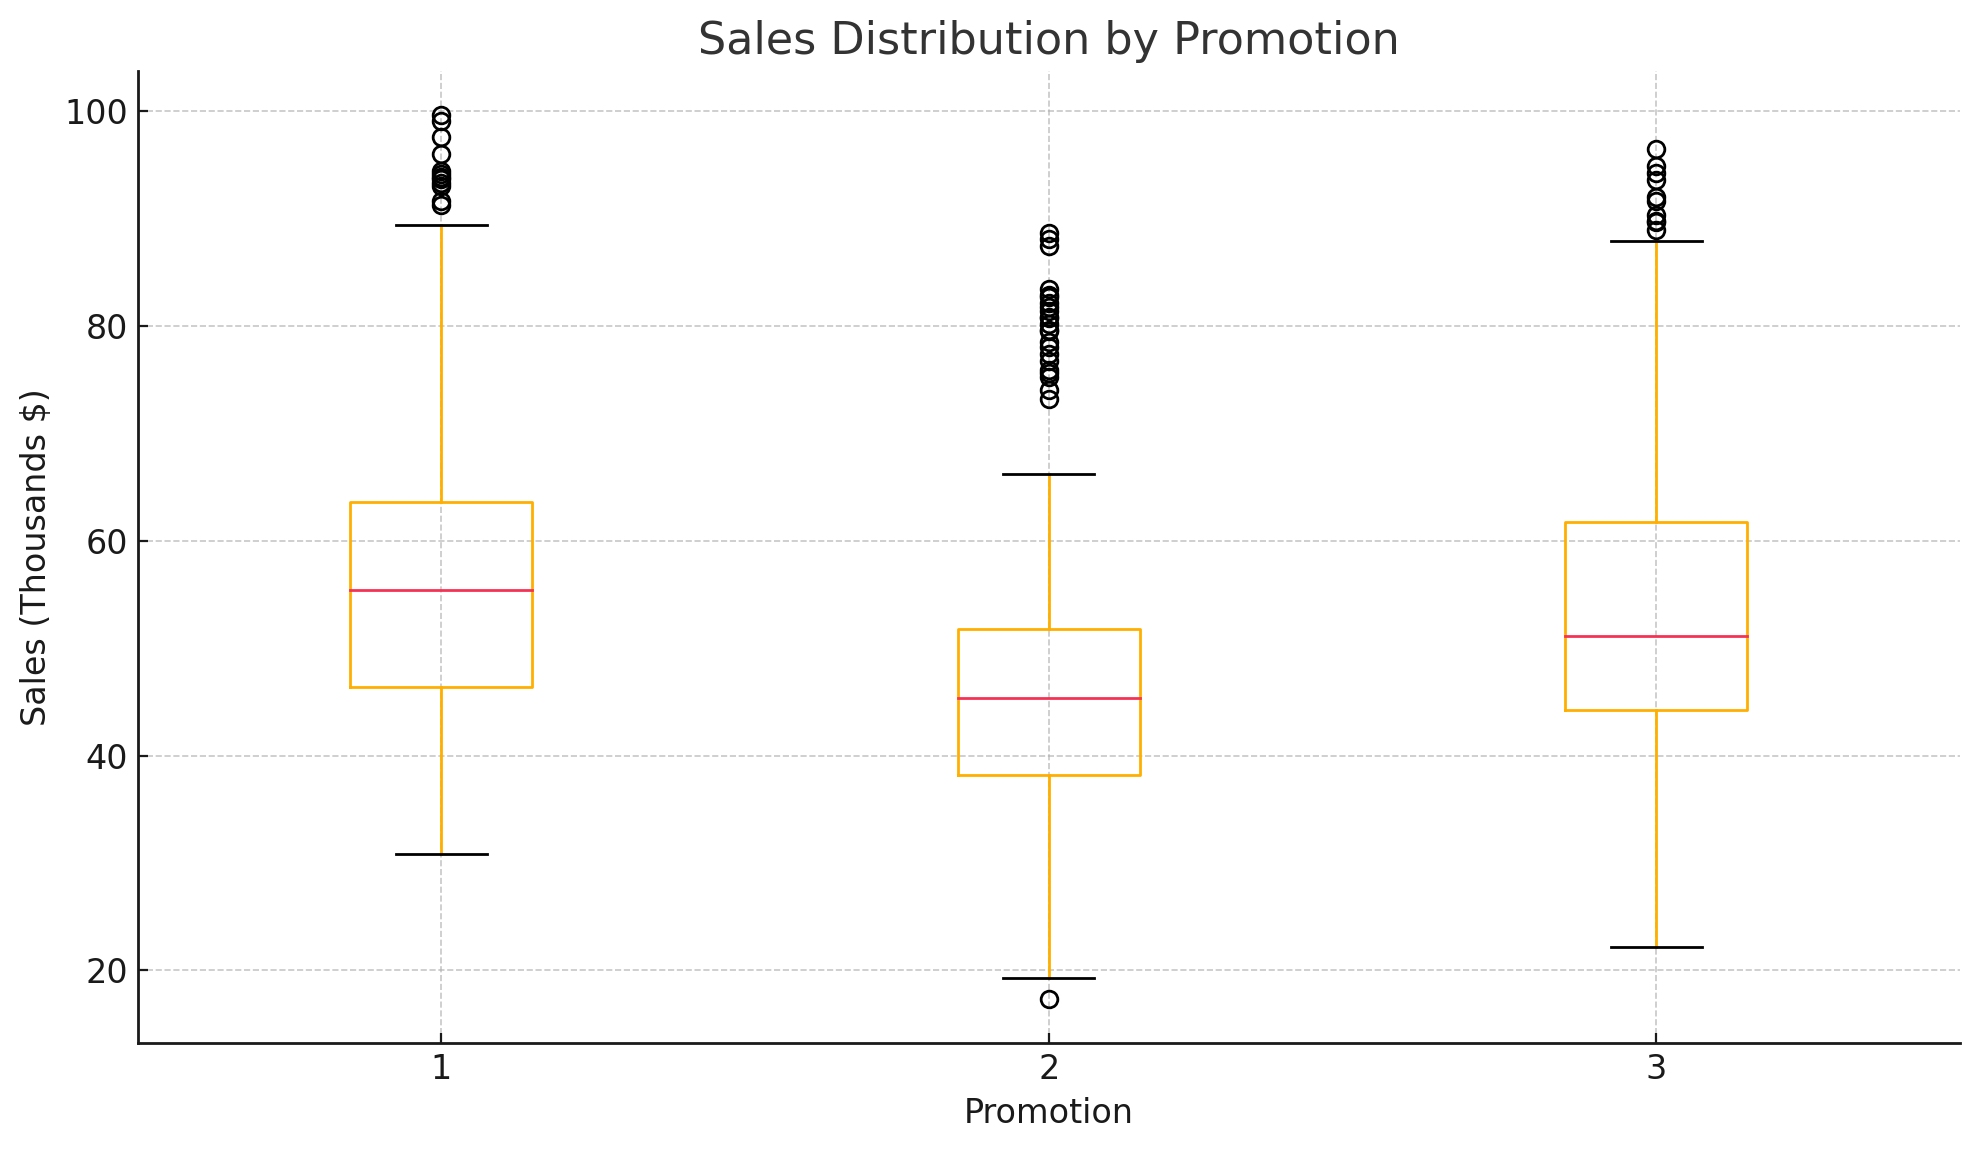

**Key Findings & Recommendation**
---

Promotion 1 outperforms Promotion 2 and is statitically tied with Promotion 3. Promotion 1 is recommending for chain-wide use. It provides the highest observed sales. Retain Promotion 3 for A/B rotation or demographic subsets to validate longer-term performance.